# ASSIGNMENT 3

## GROUP MEMBERS

1. SYEINRITA DEVI ANBEALAGAN MCS221022
2. BAKUNGA BRONSON MCS232006
3. LINGGESH A/L TAMILMANI MCS232005

**MCSD2123 MASSIVE DATA MINING AND STREAMING**
- Due: 28th December 2023
- Mode: Group Assignment
- Submission: E-Learning

### Data Exploration & Preprocessing

In [2]:
import pandas as pd
import numpy as np

# Load the original dataset
df1 = pd.read_csv('IMDB Dataset.csv')

# Randomly select 20,000 samples
df1_label = df1.sample(n=20000, random_state=42)

# Create a copy of the DataFrame without the 'sentiment' column
df2 = df1_label.drop(columns=['sentiment'])

# Save the new DataFrame as a CSV file
df2.to_csv('IMDB_Dataset_RandomSubset.csv', index=False)

# Display the head of the new DataFrame
df2.head()


,review
33553,I really liked this Summerslam due to the look...
9427,Not many television shows appeal to quite as m...
199,The film quickly gets to a major chase scene w...
12447,Jane Austen would definitely approve of this o...
39489,Expectations were somewhat high for me when I ...


In [3]:
# Get the shape of the DataFrame
shape = df2.shape

# Print the DataFrame shape
print('\nDataFrame Shape:', shape)

# Get and print the number of rows
num_rows = shape[0]
print('\nNumber of rows:', num_rows)

# Get and print the number of columns
num_columns = shape[1]
print('\nNumber of columns:', num_columns)



DataFrame Shape: (20000, 1)

Number of rows: 20000

Number of columns: 1


In [4]:
# Check for data type
data_types = df2.dtypes
print(data_types)

review    object
dtype: object


In [5]:
# Get summary statistics for numeric columns in the DataFrame
df2.describe()

,review
count,20000
unique,19926
top,"Hilarious, clean, light-hearted, and quote-wor..."
freq,3


In [6]:
# Check for missing values
missing_values = df2.isnull().sum()

# Print the count of missing values in each column
print("Number of missing values:")
print(missing_values)

Number of missing values:
review    0
dtype: int64


In [7]:
# Check for duplicates in df1
duplicate_rows_df1 = df1_label.duplicated()
duplicate_count_df1 = duplicate_rows_df1.sum()
print(f"Number of duplicate rows in df1: {duplicate_count_df1}")

# Check for duplicates in df2
duplicate_rows_df2 = df2.duplicated()
duplicate_count_df2 = duplicate_rows_df2.sum()
print(f"Number of duplicate rows in df2: {duplicate_count_df2}")

Number of duplicate rows in df1: 74
Number of duplicate rows in df2: 74


In [8]:
# Drop duplicates in df1
df1_label = df1_label.drop_duplicates()

# Save df1 with dropped duplicates to a new CSV file
df1_label.to_csv('IMDB_Dataset_Labelled.csv', index=False)

# Drop duplicates in df2
df2 = df2.drop_duplicates()

# Check the shape of the DataFrame after removing duplicates
print(f"Shape of DataFrame after removing duplicates: {df2.shape}")

Shape of DataFrame after removing duplicates: (19926, 1)


### Text Normalization

In [9]:
import re
import random
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import string
from contractions import contractions_dict
import contractions


# Function to fix contractions using the contractions library
def fix_contractions(tweet):
    tweet = contractions.fix(tweet)
    return tweet

# Function for text processing
def text_processing(review, default_replace=""):
    # Convert review to lowercase
    review = review.lower()
    
    # Remove HTML tags
    review = re.sub('<.*?>', default_replace, review)
    
    # Remove URLs
    review = re.sub('https?://\S+|www\.\S+', default_replace, review)   
    return review

# Function for custom tokenization
def custom_tokenize(review):
    token_list = word_tokenize(review)

    # Remove punctuation
    token_list = [token for token in token_list if token not in string.punctuation]

    # Keep alphabets only
    token_list = [token for token in token_list if token.isalpha()]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    token_list = [token for token in token_list if not token in stop_words]

    return token_list

# Function to stem tokens
def stem_tokens(tokens, stemmer):
    token_list = [stemmer.stem(token) for token in tokens]
    return token_list

# Function to process a review (combining the above functions)
def process_review(review):
    # Step 1: Text Processing
    review = text_processing(review)
    
    # Step 2: Expanding Contractions
    review = fix_contractions(review)
    
    # Step 3: Tokenization
    tokens = custom_tokenize(review)
    
    # Step 4: Stemming
    stemmer = SnowballStemmer("english")  # Define stemmer
    stem = stem_tokens(tokens, stemmer)  # Stem tokens
    
    # Step 5: Return the processed and tokenized review
    return stem

# Print tokenized words for a random subset of comments to see how it is working
for i in range(3):
    random_index = random.randint(0, len(df2))
    tweet = df2.iloc[random_index]["review"]
    print(process_review(tweet))
    print("\n")

['year', 'old', 'time', 'live', 'salt', 'lake', 'citi', 'utah', 'still', 'rememb', 'new', 'dome', 'theater', 'call', 'centuri', 'layback', 'chair', 'rock', 'new', 'sound', 'system', 'larg', 'screen', 'huge', 'open', 'space', 'screen', 'pack', 'theater', 'felt', 'excit', 'new', 'preview', 'screen', 'film', 'ta', 'da', 'da', 'daa', 'da', 'ta', 'da', 'dada', 'dada', 'still', 'hear', 'open', 'music', 'ring', 'trumpet', 'crash', 'cymbal', 'love', 'interplay', 'charact', 'film', 'vista', 'know', 'peter', 'finch', 'love', 'salli', 'troubl', 'hey', 'feel', 'good', 'go', 'feel', 'better', 'thing', 'film', 'regret', 'way', 'cut', 'meaning', 'heart', 'show', 'cut', 'version', 'call', 'flop', 'saw', 'cut', 'version', 'see', 'lost', 'view', 'vision', 'preview', 'edit', 'yes', 'winc', 'bit', 'peter', 'effort', 'make', 'love', 'music', 'know', 'see', 'way', 'left', 'theater', 'survey', 'us', 'left', 'regret', 'comment', 'made', 'may', 'alter', 'origin', 'like', 'still', 'see', 'listen', 'music', 'lp'

In [10]:
# Applying the processing function to the DataFrame
df2["token"] = df2["review"].apply(process_review)

# Display the DataFrame
df2.head()

,review,token
33553,I really liked this Summerslam due to the look...,"[realli, like, summerslam, due, look, arena, c..."
9427,Not many television shows appeal to quite as m...,"[mani, televis, show, appeal, quit, mani, diff..."
199,The film quickly gets to a major chase scene w...,"[film, quick, get, major, chase, scene, ever, ..."
12447,Jane Austen would definitely approve of this o...,"[jane, austen, would, definit, approv, one, gw..."
39489,Expectations were somewhat high for me when I ...,"[expect, somewhat, high, went, see, movi, thou..."


### Exploratory Data Analysis (EDA)

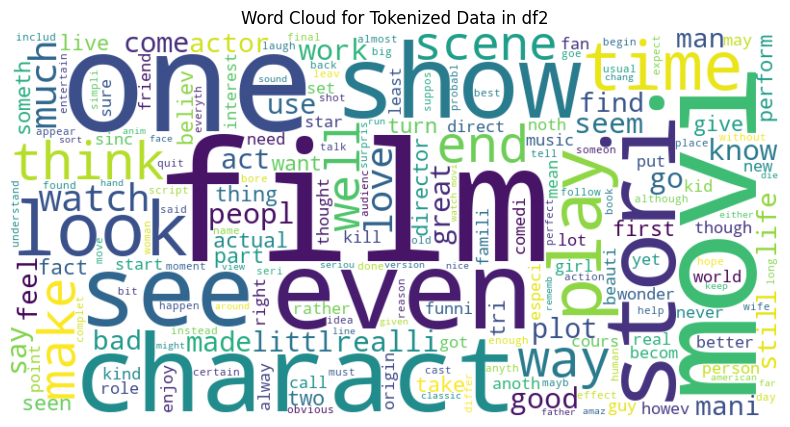

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

tokenized_data_df2 = df2['token']

# Combine the tokenized words into a single string
all_tokens_df2 = ' '.join([' '.join(tokens) for tokens in tokenized_data_df2])

# Generate the word cloud
wordcloud_df2 = WordCloud(width=800, height=400, background_color='white').generate(all_tokens_df2)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_df2, interpolation='bilinear')
plt.title('Word Cloud for Tokenized Data in df2')
plt.axis('off')
plt.show()


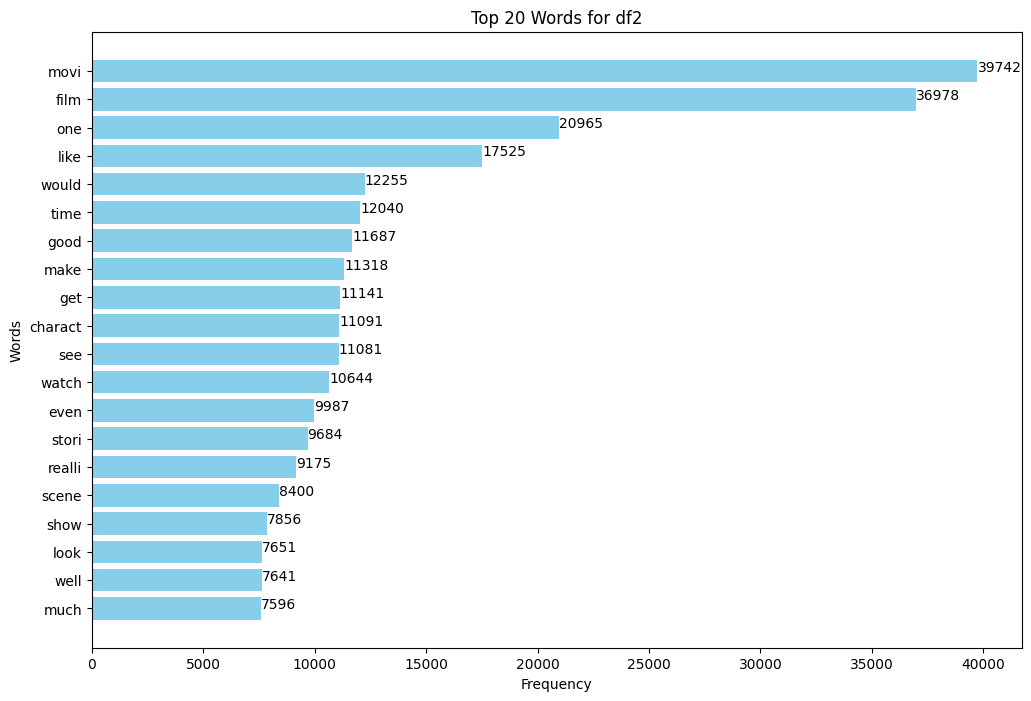

In [12]:
from collections import Counter
import matplotlib.pyplot as plt

tokenized_data_df2 = df2['token']

# Flatten the list of lists in the 'token' column for the entire dataset
all_tokens_df2 = [word for sublist in tokenized_data_df2 for word in sublist]

# Counter for the entire dataset
all_tokens_df2_counter = Counter(all_tokens_df2)

# Plot the top 20 words for df2
plt.figure(figsize=(12, 8))
top_20_df2 = all_tokens_df2_counter.most_common(20)[::-1]  # Reverse the order
plt.barh(*zip(*top_20_df2), color='skyblue')
for index, value in enumerate(top_20_df2):
    plt.text(value[1], index, str(value[1]))
plt.title('Top 20 Words for df2')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()


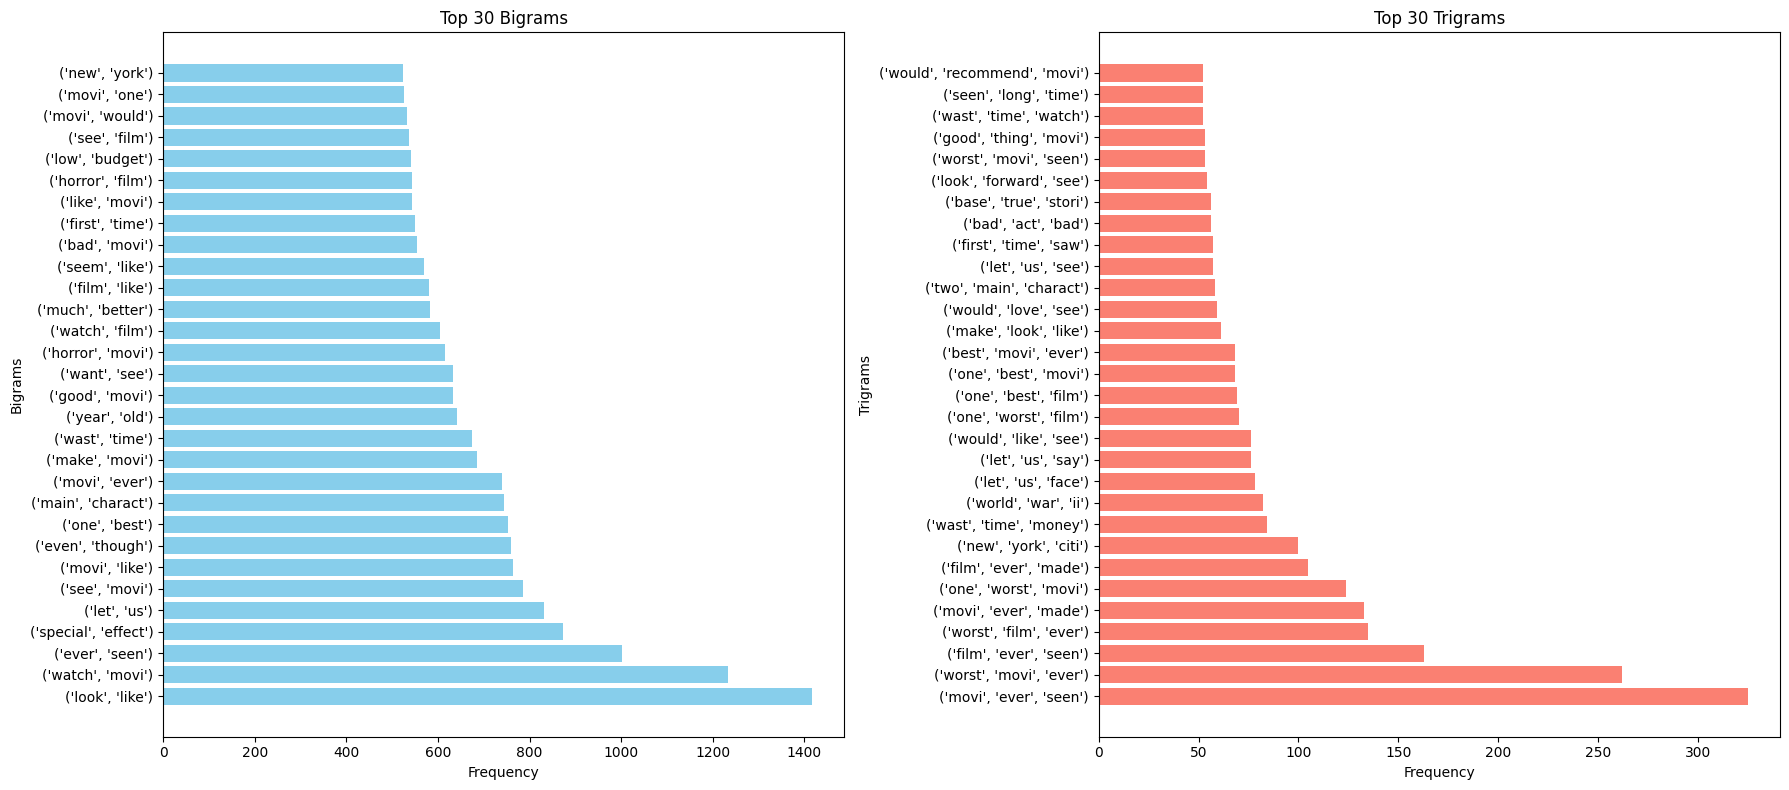

In [13]:
from nltk import bigrams, trigrams
from collections import Counter

# Combine positive and negative reviews for bigram and trigram extraction
all_reviews_bigrams = list(bigrams([word for sublist in df2['token'] for word in sublist]))
all_reviews_trigrams = list(trigrams([word for sublist in df2['token'] for word in sublist]))

# Counters for all reviews bigrams and trigrams
all_reviews_bigrams_counter = Counter(all_reviews_bigrams)
all_reviews_trigrams_counter = Counter(all_reviews_trigrams)

# Get the top 30 bigrams and trigrams
top_30_bigrams = all_reviews_bigrams_counter.most_common(30)
top_30_trigrams = all_reviews_trigrams_counter.most_common(30)

# Plot bigrams and trigrams in a 1:2 ratio
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plot the top 30 bigrams
axes[0].barh(range(len(top_30_bigrams)), [count for bigram, count in top_30_bigrams], color='skyblue')
axes[0].set_yticks(range(len(top_30_bigrams)))
axes[0].set_yticklabels([bigram for bigram, count in top_30_bigrams])
axes[0].set_title('Top 30 Bigrams')
axes[0].set_xlabel('Frequency')
axes[0].set_ylabel('Bigrams')

# Plot the top 30 trigrams
axes[1].barh(range(len(top_30_trigrams)), [count for trigram, count in top_30_trigrams], color='salmon')
axes[1].set_yticks(range(len(top_30_trigrams)))
axes[1].set_yticklabels([trigram for trigram, count in top_30_trigrams])
axes[1].set_title('Top 30 Trigrams')
axes[1].set_xlabel('Frequency')
axes[1].set_ylabel('Trigrams')

plt.tight_layout()
plt.show()


### Text Vectorization

In [14]:
# Step 1: Text Vectorization using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

text_data_df2 = df2['review']

# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the text data
tfidf_matrix_df2 = tfidf_vectorizer.fit_transform(text_data_df2)

# Convert the result to a DataFrame (optional)
df_tfidf = pd.DataFrame(tfidf_matrix_df2.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the shape of the TF-IDF matrix
print(f"Shape of TF-IDF matrix: {tfidf_matrix_df2.shape}")


Shape of TF-IDF matrix: (19926, 5000)


In [16]:
# Apply dimensionality reduction
n_components = 50  
svd = TruncatedSVD(n_components=n_components)
tfidf_matrix_reduced = svd.fit_transform(tfidf_matrix_df2)

## K Means

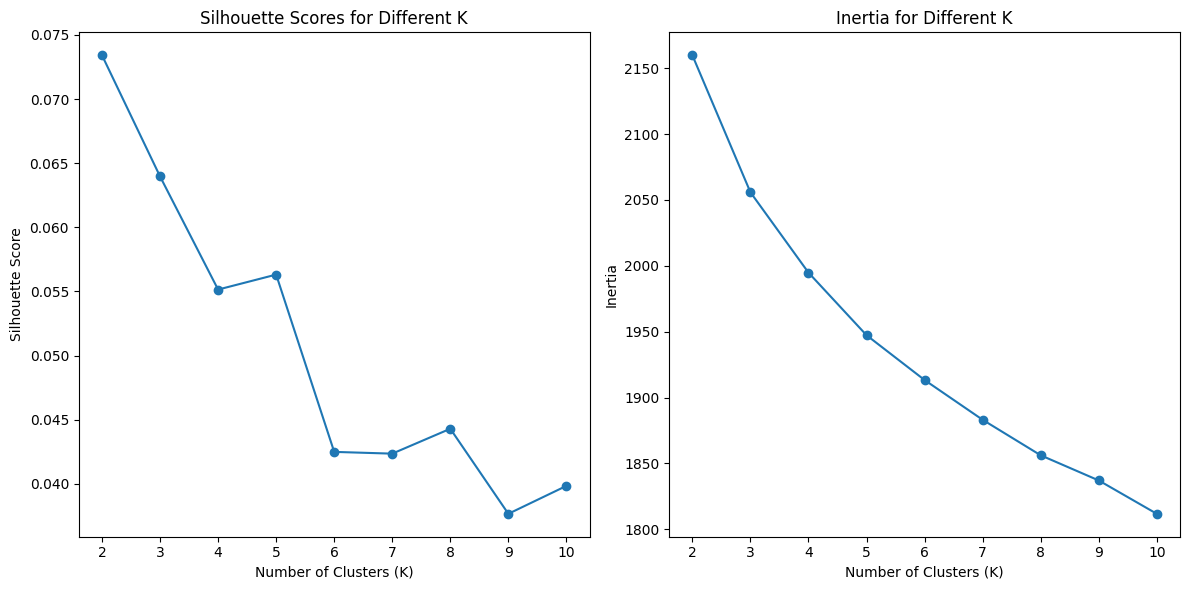

    K      Inertia  Silhouette Score
0   2  2159.774384          0.073417
1   3  2055.792283          0.063969
2   4  1994.809690          0.055148
3   5  1947.312825          0.056316
4   6  1913.297623          0.042493
5   7  1883.117354          0.042355
6   8  1856.176661          0.044296
7   9  1837.079715          0.037666
8  10  1811.768809          0.039842


In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import TruncatedSVD

# Apply dimensionality reduction
n_components = 50  
svd = TruncatedSVD(n_components=n_components)
tfidf_matrix_reduced = svd.fit_transform(tfidf_matrix_df2)

# Step 2: Clustering and Evaluation
# Initialize lists to store inertia and silhouette scores
inertia_values = []
silhouette_scores = []

# Range of k values to try
k_values = range(2, 11)

# Loop through different k values
for k in k_values:
    # K-Means Clustering
    kmeans = KMeans(n_init=10, n_clusters=k, random_state=42)
    df2['cluster'] = kmeans.fit_predict(tfidf_matrix_reduced)

    # Calculate silhouette score
    silhouette = silhouette_score(tfidf_matrix_reduced, df2['cluster'])
    silhouette_scores.append(silhouette)

    # Calculate inertia
    inertia_values.append(kmeans.inertia_)

# Plotting the results
plt.figure(figsize=(12, 6))

# Plot Silhouette Scores
plt.subplot(1, 2, 1)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')

# Plot Inertia
plt.subplot(1, 2, 2)
plt.plot(k_values, inertia_values, marker='o')
plt.title('Inertia for Different K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')

plt.tight_layout()
plt.show()

# Display the list of inertia and silhouette score for each k
result_df = pd.DataFrame({'K': k_values, 'Inertia': inertia_values, 'Silhouette Score': silhouette_scores})
print(result_df)

In [15]:
from sklearn.cluster import KMeans
# Step 2: KMeans Clustering with k=2
k = 2
kmeans = KMeans(n_clusters=k, init='k-means++', n_init=12, random_state=42)
df2['cluster_kmeans'] = kmeans.fit_predict(tfidf_matrix_reduced)

In [16]:
kmean_labels = kmeans.labels_
print(kmean_labels)

kmean_cluster_centers = kmeans.cluster_centers_
print(kmean_cluster_centers)

[0 1 1 ... 1 1 1]
[[ 3.51474415e-01 -5.61896968e-02  3.46314489e-02  7.68188580e-03
  -5.01389846e-03  1.04978488e-03  2.65670142e-03  8.14674911e-03
   4.66887705e-03 -2.54159117e-03  3.60399338e-04  1.73665383e-03
   6.54839168e-03  1.24761831e-03  3.92903582e-03  2.72290394e-03
  -2.59361218e-06 -2.03023213e-03  3.74818715e-04  2.12950877e-04
   1.00855112e-03  1.47057118e-03 -9.85797207e-04  2.08995459e-03
   8.96379608e-04  3.74368289e-05 -2.20479863e-04  1.08542370e-03
  -1.06723192e-03 -1.53432230e-03  9.99589964e-04 -1.86923566e-04
  -1.40918306e-04 -9.06864688e-04  9.53168685e-04 -1.33223689e-03
   1.28995739e-03  5.02073766e-04  3.03603229e-04  3.31107377e-04
  -4.66106689e-05  1.56109438e-04  1.82257256e-04 -4.35687970e-04
  -1.57898134e-04 -4.18736401e-04 -1.38422729e-04  4.87977436e-04
   7.20958564e-04  3.06192476e-04]
 [ 4.79291389e-01  6.59472213e-02 -3.19000558e-02 -4.12868579e-03
   3.35738494e-03 -9.65840650e-04 -1.61566605e-03 -4.61820895e-03
  -2.47021334e-03  1.14

In [17]:
# Count occurrences of each cluster label
cluster_counts = df2['cluster_kmeans'].value_counts()

# Display the counts
for label, count in cluster_counts.items():
    print(f"Cluster {label}: {count} instances")

Cluster 0: 11299 instances
Cluster 1: 8627 instances


In [18]:
from sklearn.metrics import pairwise_distances

# Calculate Cohesion and Separation

# Initialize cohesion
cohesion_kmeans = 0

# Calculate the cohesion as the sum of the distances from each point to the center of its cluster
for i in range(kmeans.n_clusters):
    # Points in the current cluster
    points_in_cluster = tfidf_matrix_reduced[kmean_labels == i]

    # Center of the current cluster
    cluster_center = kmeans.cluster_centers_[i]

    # Sum of distances of points in the cluster to the cluster center
    cohesion_kmeans += np.sum(np.linalg.norm(points_in_cluster - cluster_center, axis=1))

centroid_distances_kmeans = pairwise_distances(kmeans.cluster_centers_, metric='euclidean')

# We first set the diagonal to np.inf to avoid zero distance to the centroid itself
np.fill_diagonal(centroid_distances_kmeans, np.inf)

# Then we can calculate the minimum distance from each centroid to all other centroids
min_distances = np.min(centroid_distances_kmeans, axis=1)

# Calculate the separation as the average of these minimum distances
separation_kmeans = np.mean(min_distances)

# Print the Metrics
print(f"Cohesion Kmeans: {cohesion_kmeans}")
print(f"Separation Kmeans: {separation_kmeans}")

Cohesion Kmeans: 6442.050958597597
Separation Kmeans: 0.19070834967665506


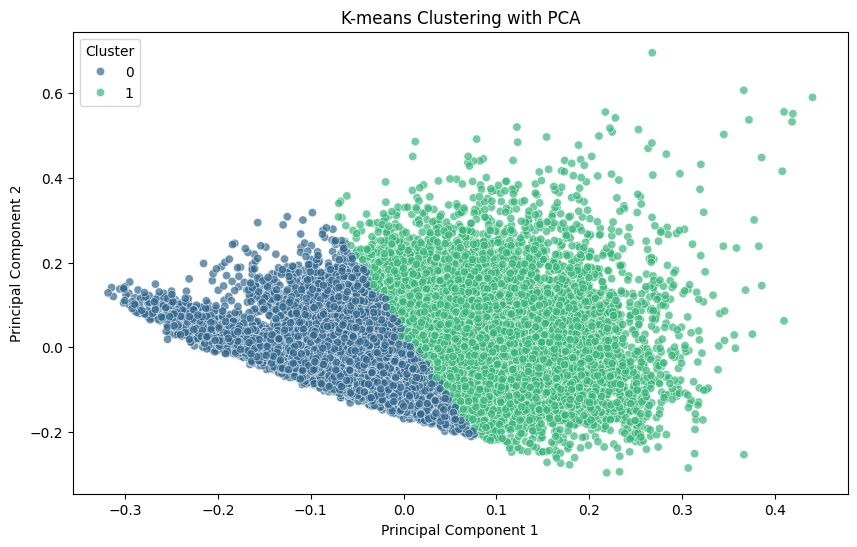

In [19]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Perform PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(tfidf_matrix_reduced)

# Add the PCA components to the DataFrame
df2['pca1'] = pca_result[:, 0]
df2['pca2'] = pca_result[:, 1]

# Plot the clusters using PCA components
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca1', y='pca2', hue='cluster_kmeans', data=df2, palette='viridis', alpha=0.7)
plt.title('K-means Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


## Hierarchical Clustering

In [20]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, cdist
from sklearn.metrics import silhouette_score

# Create empty lists to store results
silhouette_scores = []
cohesion_values = []
separation_values = []

# Step 3: Hierarchical Clustering and Evaluation
k_values = [2, 3, 5]

# Convert the sparse matrix to a dense array
tfidf_matrix_dense = tfidf_matrix_reduced

# Loop through different k values
for k in k_values:
    # Loop through different linkage methods
    linkage_methods = ['ward', 'complete', 'average', 'single']
    for linkage_method in linkage_methods:
        # Hierarchical Clustering
        hierarchical_cluster = AgglomerativeClustering(n_clusters=k, linkage=linkage_method)
        cluster_labels = hierarchical_cluster.fit_predict(tfidf_matrix_dense)

        # Calculate silhouette score
        silhouette = silhouette_score(tfidf_matrix_dense, cluster_labels)

        # Calculate pairwise distances
        pairwise_distances = pdist(tfidf_matrix_dense)

        # Initialize cohesion
        cohesion = 0

        # Calculate cohesion and separation
        for i in range(k):
            cluster_data = tfidf_matrix_dense[cluster_labels == i]
            if len(cluster_data) > 0:  # check if cluster is not empty
                cluster_center = cluster_data.mean(axis=0)
                intra_cluster_distances = cdist(cluster_data, [cluster_center], 'euclidean')
                cohesion += intra_cluster_distances.sum()

        # Calculate separation
        separation = np.sum(pairwise_distances) - cohesion

        # Print and/or store the evaluation metrics
        print(f"Metrics for k={k}, linkage={linkage_method}:")
        print(f"Silhouette Score: {silhouette}")
        print(f"Cohesion: {cohesion}")
        print(f"Separation: {separation}")
        print("-----------------------------")

        # Store the results in lists
        silhouette_scores.append({'k': k, 'linkage': linkage_method, 'silhouette': silhouette})
        cohesion_values.append({'k': k, 'linkage': linkage_method, 'cohesion': cohesion})
        separation_values.append({'k': k, 'linkage': linkage_method, 'separation': separation})



Metrics for k=2, linkage=ward:
Silhouette Score: 0.04248967014259301
Cohesion: 6553.589240932901
Separation: 94787099.2550963
-----------------------------
Metrics for k=2, linkage=complete:
Silhouette Score: 0.055261194206247956
Cohesion: 6609.64845546363
Separation: 94787043.19588177
-----------------------------
Metrics for k=2, linkage=average:
Silhouette Score: 0.3526392475231595
Cohesion: 6703.719983563181
Separation: 94786949.12435368
-----------------------------
Metrics for k=2, linkage=single:
Silhouette Score: 0.40298071915607575
Cohesion: 6704.200712959142
Separation: 94786948.64362428
-----------------------------
Metrics for k=3, linkage=ward:
Silhouette Score: 0.035568049941057195
Cohesion: 6443.781790880185
Separation: 94787209.06254636
-----------------------------
Metrics for k=3, linkage=complete:
Silhouette Score: 0.05408032836907665
Cohesion: 6600.4285227549935
Separation: 94787052.41581449
-----------------------------
Metrics for k=3, linkage=average:
Silhouette 

In [21]:
hc_model = AgglomerativeClustering(n_clusters=2 ,linkage='single')
df2['cluster_hc'] = hc_model.fit_predict(tfidf_matrix_dense)

In [22]:
import numpy as np

# Print hierarchical clustering labels
hc_labels = hc_model.labels_
print("Hierarchical Clustering Labels:")
print(hc_labels)

# Count occurrences of each hierarchical clustering label
unique_labels, counts = np.unique(hc_labels, return_counts=True)
hc_cluster_counts = dict(zip(unique_labels, counts))

# Display the counts
print("\nCounts of Instances in Each Hierarchical Cluster:")
for label, count in hc_cluster_counts.items():
    print(f"Cluster {label}: {count} instances")


Hierarchical Clustering Labels:
[0 0 0 ... 0 0 0]

Counts of Instances in Each Hierarchical Cluster:
Cluster 0: 19925 instances
Cluster 1: 1 instances


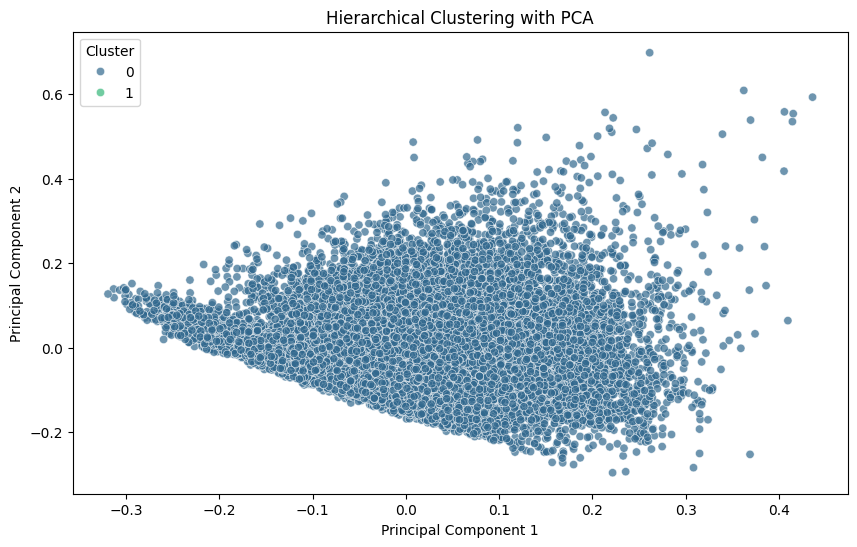

In [23]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Perform PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(tfidf_matrix_df2.toarray())

# Add the PCA components to the DataFrame
df2['pca1'] = pca_result[:, 0]
df2['pca2'] = pca_result[:, 1]

# Plot the clusters using PCA components
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca1', y='pca2', hue='cluster_hc', data=df2, palette='viridis', alpha=0.7)
plt.title('Hierarchical Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


In [24]:
from scipy.spatial.distance import pdist, squareform

# Calculate the condensed distance matrix
distance_matrix = pdist(tfidf_matrix_reduced, metric='euclidean')

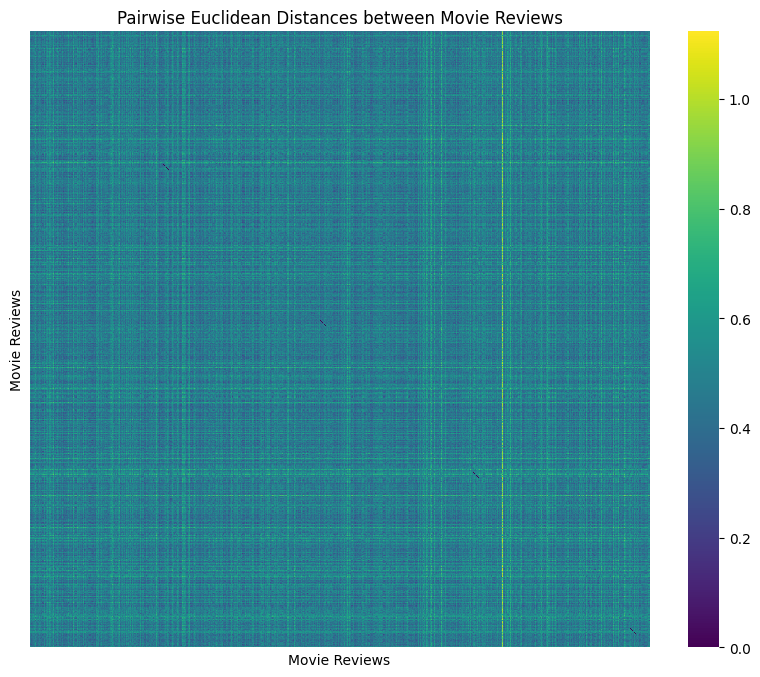

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap for the distance matrix
plt.figure(figsize=(10, 8))
sns.heatmap(squareform(distance_matrix), cmap='viridis', xticklabels=False, yticklabels=False)
plt.title('Pairwise Euclidean Distances between Movie Reviews')
plt.xlabel('Movie Reviews')
plt.ylabel('Movie Reviews')
plt.show()


In [27]:
import sys

# Set the maximum recursion depth to, e.g., 100_000
sys.setrecursionlimit(100_000)

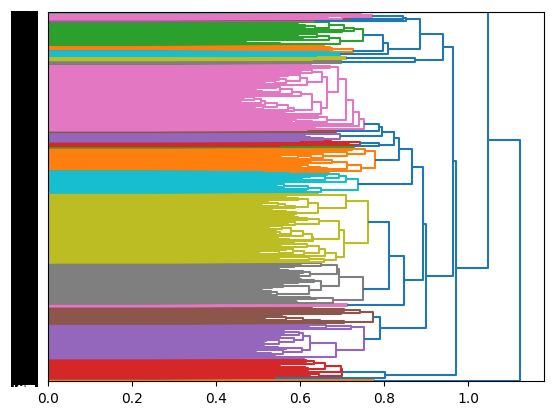

In [52]:
from scipy.cluster import hierarchy

linkage = hierarchy.linkage(distance_matrix, 'single')

def llf(id):
    return '[%s]' % (id)
    
dendo = hierarchy.dendrogram(linkage, leaf_label_func=llf, leaf_font_size=5, orientation='right')

## DBSCAN

In [17]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import TruncatedSVD
import numpy as np

# Range of epsilon values to try
epsilon_values = np.arange(0.1, 2.0, 0.2)

# Range of min_samples values to try
min_samples_values = range(5, 16, 5)

# Initialize lists to store results
results = []

# Loop through different epsilon values
for epsilon in epsilon_values:
    # Loop through different min_samples values
    for min_samples in min_samples_values:
        # DBSCAN Clustering
        dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
        cluster_labels = dbscan.fit_predict(tfidf_matrix_reduced)

        # Check if more than one cluster is formed
        if len(set(cluster_labels)) > 1:
            # Calculate silhouette score
            silhouette = silhouette_score(tfidf_matrix_reduced, cluster_labels)
            results.append({'epsilon': epsilon, 'min_samples': min_samples, 'silhouette': silhouette})

# Print the results
for result in results:
    print(f"Parameters: Epsilon={result['epsilon']}, Min Samples={result['min_samples']}, Silhouette Score={result['silhouette']}")

Parameters: Epsilon=0.30000000000000004, Min Samples=5, Silhouette Score=0.10870606520273977
Parameters: Epsilon=0.30000000000000004, Min Samples=10, Silhouette Score=0.10393725144739639
Parameters: Epsilon=0.30000000000000004, Min Samples=15, Silhouette Score=0.10627337668774003
Parameters: Epsilon=0.5000000000000001, Min Samples=10, Silhouette Score=0.3953033459716629
Parameters: Epsilon=0.5000000000000001, Min Samples=15, Silhouette Score=0.3953033459716629


In [18]:
# Apply final dimensionality reduction to 50 components
n_components = 50  
svd = TruncatedSVD(n_components=n_components)
tfidf_matrix_reduced = svd.fit_transform(tfidf_matrix_df2)

In [19]:
dbscan_model = DBSCAN(eps=0.5000000000000001, min_samples=5)
df2['cluster_dbscan'] = dbscan_model.fit_predict(tfidf_matrix_reduced)

In [20]:
# Print dbscan clustering labels
dbscan_labels = dbscan_model.labels_
print("Hierarchical Clustering Labels:")
print(dbscan_labels)

# Count occurrences of each dbscan clustering label
unique_labels, counts = np.unique(dbscan_labels, return_counts=True)
dbscan_cluster_counts = dict(zip(unique_labels, counts))

# Display the counts
print("\nCounts of Instances in Each DBSCAN Cluster:")
for label, count in dbscan_cluster_counts.items():
    print(f"Cluster {label}: {count} instances")


Hierarchical Clustering Labels:
[0 0 0 ... 0 0 0]

Counts of Instances in Each DBSCAN Cluster:
Cluster -1: 1 instances
Cluster 0: 19925 instances


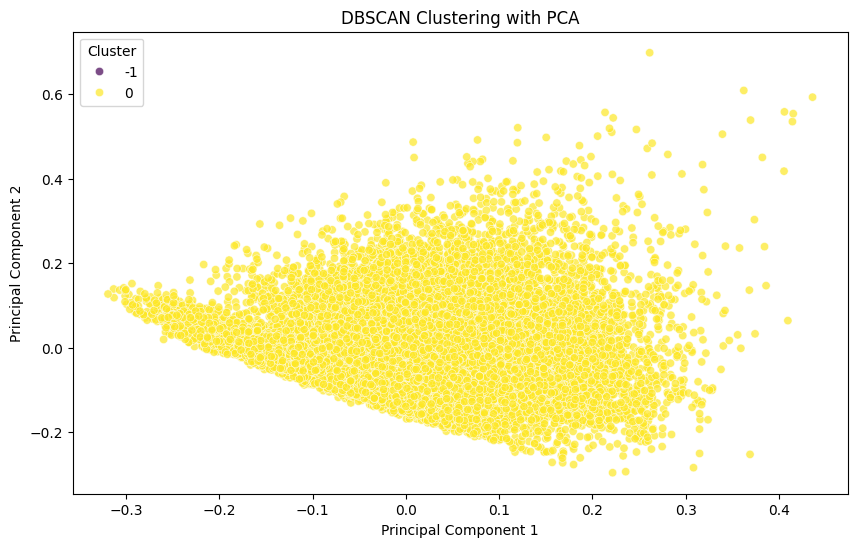

In [21]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Perform PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(tfidf_matrix_df2.toarray())

# Add the PCA components to the DataFrame
df2['pca1'] = pca_result[:, 0]
df2['pca2'] = pca_result[:, 1]

# Plot the clusters using PCA components
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca1', y='pca2', hue='cluster_dbscan', data=df2, palette='viridis', alpha=0.7)
plt.title('DBSCAN Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()
